In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sys
import time
import math
sys.path.insert(0, '..')

from database.dataset import INBreast_Dataset
from metrics.metrics_utils import get_tp_fp_fn_center_patch_criteria
from mc_candidate_proposal.morphology_mc import MorphologyCalcificationDetection

from tqdm import tqdm
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
from pathlib import Path

import warnings
import seaborn as sns
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

Set the database

In [3]:
db = INBreast_Dataset(
    return_lesions_mask=True,
    level='image',
    max_lesion_diam_mm=None,
    extract_patches=False,
    partitions = ['validation'],
    lesion_types = ['calcification', 'cluster'],
    cropped_imgs = True,
    keep_just_images_of_lesion_type = False,
    use_muscle_mask=True,
    ignore_diameter_px = 15
)

Morphology Detection

In [3]:
results_path = Path.cwd().parent.parent / 'data/comparisson_between_detectors/'
results_path.mkdir(exist_ok=True, parents=True)

In [4]:
m_results_path = results_path / 'morphology'
m_results_path.mkdir(exist_ok=True, parents=True)

threshold = 0.97
min_distance = 6
area = 14
results_morphology_complete = []
for threshold in [0.93, 0.95, 0.97, 0.99]:
    result_det = {}
    res = []
    for idx in tqdm(range(len(db)), total=len(db)):
        rbd_path = m_results_path / 'recounstructed_by_dialation_img'
        rbd_path.mkdir(exist_ok=True, parents=True)
        md = MorphologyCalcificationDetection(
            rbd_path, threshold=threshold, min_distance=min_distance,
            area=area*area, store_intermediate=True, filter_muscle_region=True)
        case = db[idx]
        image = case['img']
        image_id = case['img_id']
        lesion_mask = case['lesion_mask']
        muscle_mask = case['muscle_mask']

        start = time.time()
        candidate_blobs = md.detect(image, image_id, muscle_mask)
        t = time.time() - start

        tp, fp, fn, ignored_candidates = get_tp_fp_fn_center_patch_criteria(
            candidate_blobs, lesion_mask, None, 14,)
        
        img_res = {
            'img_id': image_id, 'TP': len(tp), 'FP': len(fp), 'FN': len(fn),
            'time': t, 'size': image.size, 'threshold': threshold
        }
        
        res.append(img_res)
    results_morphology = pd.DataFrame(res)
    filename = f'md_th-{threshold}_mindist-{min_distance}_area-{area}'
    results_morphology.to_csv(m_results_path/f'{filename}.csv')
    with open(m_results_path/f'{filename}.pkl', 'wb') as f:
        pickle.dump(result_det, f)
    results_morphology_complete.append(results_morphology)
results_morphology_complete = pd.concat(results_morphology_complete, ignore_index=True)
filename = f'md_mindist-{min_distance}_area-{area}_TH'
results_morphology_complete.to_csv(m_results_path/f'{filename}.csv')

100%|██████████| 118/118 [01:31<00:00,  1.29it/s]


In [8]:
m_results_path = results_path / 'morphology'
m_results_path.mkdir(exist_ok=True, parents=True)

threshold = 0.97
min_distance = 6
area = 14
results_morphology_complete = []
for area in [10, 12, 14, 16]:
    result_det = {}
    res = []
    for idx in tqdm(range(len(db)), total=len(db)):
        rbd_path = m_results_path / 'recounstructed_by_dialation_img'
        rbd_path.mkdir(exist_ok=True, parents=True)
        md = MorphologyCalcificationDetection(
            rbd_path, threshold=threshold, min_distance=min_distance,
            area=area*area, store_intermediate=True, filter_muscle_region=True)
        case = db[idx]
        image = case['img']
        image_id = case['img_id']
        lesion_mask = case['lesion_mask']
        muscle_mask = case['muscle_mask']

        start = time.time()
        candidate_blobs = md.detect(image, image_id, muscle_mask)
        t = time.time() - start

        tp, fp, fn, ignored_candidates = get_tp_fp_fn_center_patch_criteria(
            candidate_blobs, lesion_mask, None, 14)
        
        img_res = {
            'img_id': image_id, 'TP': len(tp), 'FP': len(fp), 'FN': len(fn),
            'time': t, 'size': image.size, 'area': area
        }
        
        res.append(img_res)
    results_morphology = pd.DataFrame(res)
    filename = f'md_th-{threshold}_mindist-{min_distance}_area-{area}'
    results_morphology.to_csv(m_results_path/f'{filename}.csv')
    with open(m_results_path/f'{filename}.pkl', 'wb') as f:
        pickle.dump(result_det, f)
    results_morphology_complete.append(results_morphology)
results_morphology_complete = pd.concat(results_morphology_complete, ignore_index=True)
filename = f'md_mindist-{min_distance}_threshold-{threshold}_AREA'
results_morphology_complete.to_csv(m_results_path/f'{filename}.csv')

100%|██████████| 118/118 [01:09<00:00,  1.70it/s]


In [9]:
m_results_path = results_path / 'morphology'
m_results_path.mkdir(exist_ok=True, parents=True)

threshold = 0.97
min_distance = 6
area = 14
results_morphology_complete = []
for min_distance in [3, 6, 9]:
    result_det = {}
    res = []
    for idx in tqdm(range(len(db)), total=len(db)):
        rbd_path = m_results_path / 'recounstructed_by_dialation_img'
        rbd_path.mkdir(exist_ok=True, parents=True)
        md = MorphologyCalcificationDetection(
            rbd_path, threshold=threshold, min_distance=min_distance,
            area=area*area, store_intermediate=True, filter_muscle_region=True)
        case = db[idx]
        image = case['img']
        image_id = case['img_id']
        lesion_mask = case['lesion_mask']
        muscle_mask = case['muscle_mask']

        start = time.time()
        candidate_blobs = md.detect(image, image_id, muscle_mask)
        t = time.time() - start

        tp, fp, fn, ignored_candidates = get_tp_fp_fn_center_patch_criteria(
            candidate_blobs, lesion_mask, None, 14)
        
        img_res = {
            'img_id': image_id, 'TP': len(tp), 'FP': len(fp), 'FN': len(fn),
            'time': t, 'size': image.size, 'min_distance': min_distance
        }
        
        res.append(img_res)
    results_morphology = pd.DataFrame(res)
    filename = f'md_th-{threshold}_mindist-{min_distance}_area-{area}'
    results_morphology.to_csv(m_results_path/f'{filename}.csv')
    with open(m_results_path/f'{filename}.pkl', 'wb') as f:
        pickle.dump(result_det, f)
    results_morphology_complete.append(results_morphology)
results_morphology_complete = pd.concat(results_morphology_complete, ignore_index=True)
filename = f'md_area-{area}_th-{threshold}_MINDIST'
results_morphology_complete.to_csv(m_results_path/f'{filename}.csv')

100%|██████████| 118/118 [01:09<00:00,  1.71it/s]


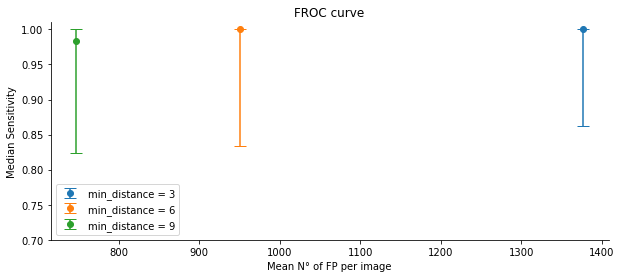

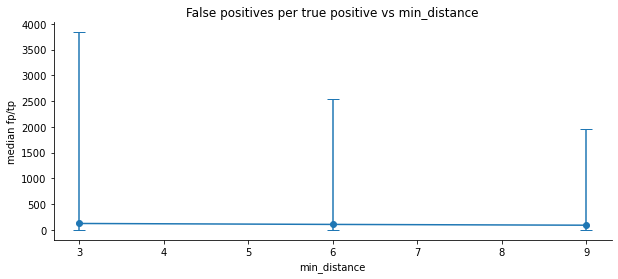

In [10]:
def plots(filename, variable):
    results_morphology_complete = pd.read_csv(m_results_path/f'{filename}.csv')
    results_morphology_complete['FPR'] = results_morphology_complete['FP'] / (results_morphology_complete['FP'] + results_morphology_complete['TP'])
    results_morphology_complete['sens'] = results_morphology_complete['TP'] / (results_morphology_complete['TP'] + results_morphology_complete['FN'])
    results_morphology_complete['fp_per_tp'] = results_morphology_complete['FP'] / (results_morphology_complete['TP'])

    cmap = plt.get_cmap("tab10")

    plt.figure(figsize=(10,4))
    for i in results_morphology_complete[variable].unique():
        subset = results_morphology_complete.loc[results_morphology_complete[variable] == i]
        sens = subset['sens'].median()
        sens_min = np.quantile(subset.sens.values, 0.25)
        sens_max = np.quantile(subset.sens.values, 0.75)
        mfpi = subset['FP'].sum() / len(subset)
        plt.errorbar(mfpi, sens, yerr=[[sens - sens_min], [sens_max - sens]], fmt='o', label=f'{variable} = {i}',capsize=6)
    plt.ylim([0.7,1.01])
    plt.ylabel('Median Sensitivity')
    plt.xlabel('Mean N° of FP per image')
    plt.title('FROC curve')
    plt.legend()
    sns.despine()
    plt.show()

    fp_per_tps = []
    m_d = []
    plt.figure(figsize=(10,4))
    for i in results_morphology_complete[variable].unique():
        selection = (results_morphology_complete[variable] == i) & (results_morphology_complete.TP != 0)
        subset = results_morphology_complete.loc[selection]
        fp_per_tp_min = subset['fp_per_tp'].min()
        fp_per_tp_max = subset['fp_per_tp'].max()
        fp_per_tp = np.median(subset['fp_per_tp'])
        fp_per_tps.append(fp_per_tp)
        m_d.append(i)
        plt.errorbar(i, fp_per_tp, yerr=[[fp_per_tp-fp_per_tp_min], [fp_per_tp_max-fp_per_tp]], fmt='o', color=cmap(0), capsize=6)
    plt.plot(m_d, fp_per_tps, color=cmap(0))
    plt.ylabel('median fp/tp')
    plt.xlabel(f'{variable}')
    plt.title(f'False positives per true positive vs {variable}')
    sns.despine()
    plt.show()

filename = f'md_area-{area}_th-{threshold}_MINDIST'
plots(filename, 'min_distance')


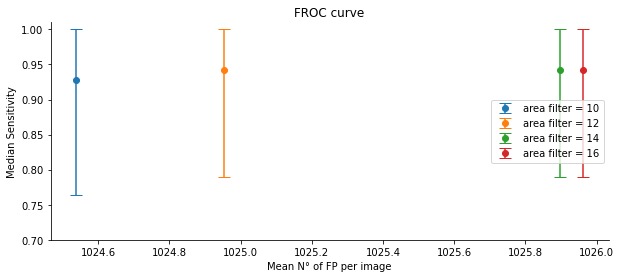

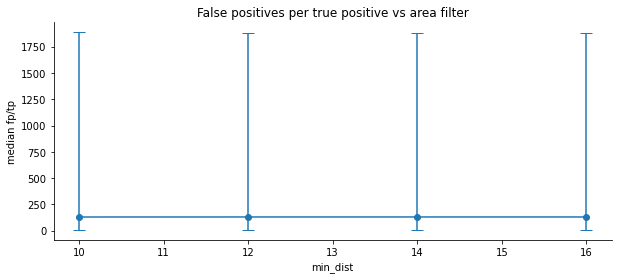

In [36]:
filename = f'md_mindist-{min_distance}_threshold-{threshold}_AREA'
plots(filename, 'area')

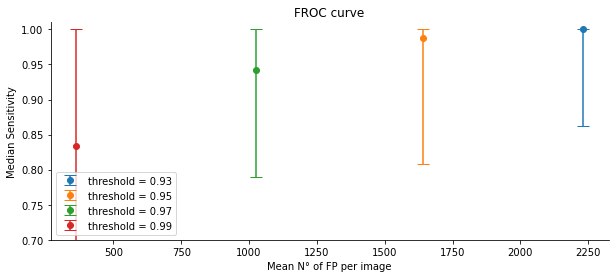

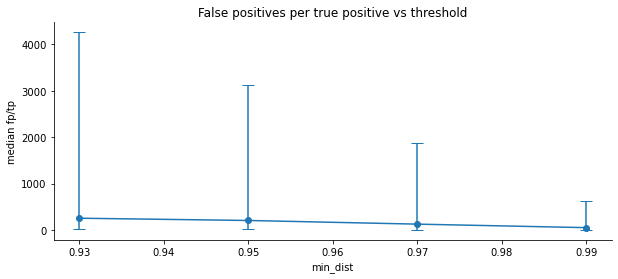

In [38]:
filename = f'md_mindist-{min_distance}_area-{area}_TH'
plots(filename, 'threshold')